In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd())) # Include ../SSD in path
!pwd

/Users/mariu/dev/school/TDT4265/project/computer-vision-and-deep-learning/SSD/notebooks


In [3]:
# Only necessary to run this on local machine
# ['/data', '/dataset_exploration', '/datasets', '/demo', '']
%cd ../

/Users/mariu/dev/school/TDT4265/project/computer-vision-and-deep-learning/src/SSD


In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from vizer.draw import draw_boxes
from tops.config import instantiate, LazyConfig
from ssd import utils
np.random.seed(0)

In [5]:
from dataset_exploration.dataset_statistics import (
    statistics,
    analyze_distribution,
    analyze_bounding_boxes,
    get_config,
    get_dataloader,
)

In [6]:
# Load config
config_path = "/Users/mariu/dev/school/TDT4265/project/computer-vision-and-deep-learning/src/SSD/configs/tdt4265.py"
cfg = get_config(config_path)

Saving SSD outputs to: outputs/


In [7]:
label_map = cfg.label_map
print(f"Label map is: {label_map}")

Label map is: {0: 'background', 1: 'car', 2: 'truck', 3: 'bus', 4: 'motorcycle', 5: 'bicycle', 6: 'scooter', 7: 'person', 8: 'rider'}


In [9]:
# Get dataloader
dataset_to_analyze = "train"
dataloader = get_dataloader(cfg, dataset_to_analyze)

In [25]:
# dir(dataloader_train)

all_training_images = list(dataloader.dataset)

In [10]:
data = next(iter(dataloader))

In [11]:
data.keys()

dict_keys(['image', 'boxes', 'labels', 'width', 'height', 'image_id'])

In [12]:
next_image = next(iter(dataloader))
print(f"Feature batch shape: {next_image['image'].size()}")
print(f"Labels batch shape: {next_image['labels'].size()}")

Feature batch shape: torch.Size([1, 3, 128, 1024])
Labels batch shape: torch.Size([1, 14])


Shape: torch.Size([3, 128, 1024])


TypeError: Invalid shape (3, 128, 1024) for image data

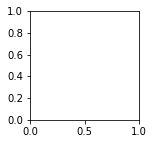

In [13]:
# Display image and label.
img = next_image['image'][0]
im2display = img #.permute(1, 2, 0)
print(f'Shape: {im2display.shape}')
label = next_image['labels'][0]
fig, ax = plt.subplots(figsize=(18, 2))
ax.imshow(im2display, cmap="gray")

In [14]:
# Draw bounding boxes
dataset_to_visualize = "train"

if dataset_to_visualize == "train":
    # Remove GroundTruthBoxesToAnchors transform
    if cfg.data_train.dataset._target_ == torch.utils.data.ConcatDataset:
        for dataset in cfg.data_train.dataset.datasets:
            dataset.transform.transforms = dataset.transform.transforms[:-1]
        else:
            cfg.data_train.dataset.transform.transforms = cfg.data_train.dataset.transform.transforms[:-1]
        dataset = instantiate(cfg.data_train.dataloader)
        gpu_transform = instantiate(cfg.data_train.gpu_transform)
    else:
        cfg.data_val.dataloader.collate_fn = utils.batch_collate
        dataset = instantiate(cfg.data_val.dataloader)
        gpu_transform = instantiate(cfg.data_val.gpu_transform)

# Assumes taht the first GPU transform is Normalize
# If it fails, just change the index from 0.
image_mean = torch.tensor(cfg.data_train.gpu_transform.transforms[0].mean).view(1, 3, 1, 1)
image_std = torch.tensor(cfg.data_train.gpu_transform.transforms[0].std).view(1, 3, 1, 1)

In [15]:
sample = next(iter(dataset))
sample = gpu_transform(sample)

In [16]:
print(f"The first sample in the dataset the following keys: {sample.keys()}")
for key, item in sample.items():
    print(key, ": shape=", item.shape if hasattr(item, "shape") else "", 
          " dtype=", item.dtype if hasattr(item, "dtype") else type(item), sep="")

The first sample in the dataset the following keys: dict_keys(['image', 'boxes', 'labels', 'width', 'height', 'image_id'])
image: shape=torch.Size([1, 3, 128, 1024]) dtype=torch.float32
boxes: shape=torch.Size([1, 14, 4]) dtype=torch.float32
labels: shape=torch.Size([1, 14]) dtype=torch.int64
width: shape=torch.Size([1]) dtype=torch.int64
height: shape=torch.Size([1]) dtype=torch.int64
image_id: shape=torch.Size([1]) dtype=torch.int64


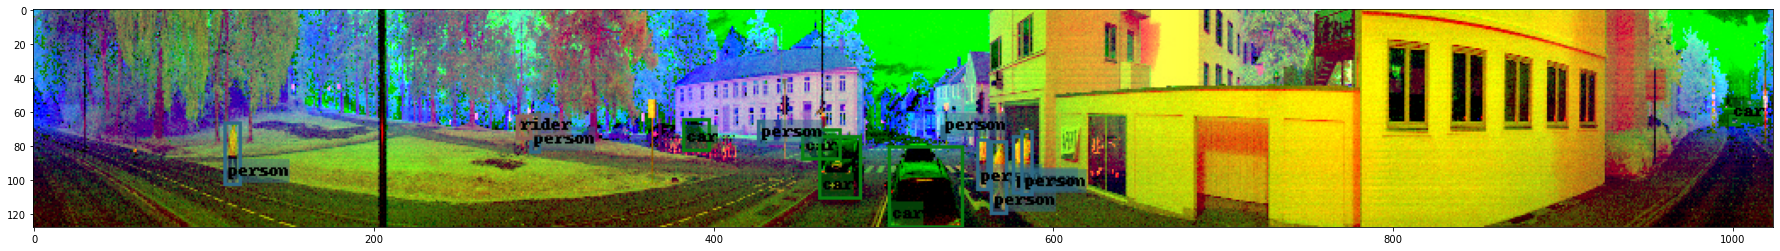

In [17]:
# Convert image to HWC byte
image = (sample["image"] * image_std + image_mean)
image = (image * 255).byte()[0]
im = image.permute(1, 2, 0).cpu().numpy()

# Convert boxes to pixel coordinates
boxes = sample["boxes"][0]
boxes[:, [0, 2]] *= image.shape[-1]  # width
boxes[:, [1, 3]] *= image.shape[-2]  # height

# Draw boxes on image, params: image, boxes with pixel coordinates, label value, label names.
im_with_boxes = draw_boxes(im, boxes.cpu().numpy(), sample["labels"][0].cpu().numpy().tolist(), class_name_map=cfg.label_map)

concat_im = np.concatenate([im, im_with_boxes], axis=0)

#fig, ax = plt.subplot(figsize=(18, 2))
#plt.imshow(im)
fig, ax = plt.subplots(figsize=(36, 4))
ax.imshow(im_with_boxes)
#plt.show()

In [14]:
statistics(dataloader, cfg)

ValueError: too many values to unpack (expected 3)

In [ ]:
dir(dataloader)

['_DataLoader__initialized',
 '_DataLoader__multiprocessing_context',
 '_IterableDataset_len_called',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_auto_collation',
 '_dataset_kind',
 '_get_iterator',
 '_index_sampler',
 '_is_protocol',
 '_iterator',
 'batch_sampler',
 'batch_size',
 'check_worker_number_rationality',
 'collate_fn',
 'dataset',
 'drop_last',
 'generator',
 'multiprocessing_context',
 'num_workers',
 'persistent_workers',
 'pin_memory',
 'prefetch_factor',
 'sampler',
 'timeout',
 'worker_init_fn']

## Testing fiftyone

In [1]:
import fiftyone as fo
import fiftyone.zoo as foz

dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    dataset_name="detector-recipe",
)

NumExpr defaulting to 8 threads.
NumExpr defaulting to 8 threads.
 100% |██████|    1.9Gb/1.9Gb [42.3s elapsed, 0s remaining, 44.3Mb/s]      
Extracting annotations to '/Users/mariu/fiftyone/coco-2017/raw/instances_val2017.json'
 100% |██████|    6.1Gb/6.1Gb [3.1m elapsed, 0s remaining, 15.8Mb/s]      
Extracting images to '/Users/mariu/fiftyone/coco-2017/validation/data'
Writing annotations to '/Users/mariu/fiftyone/coco-2017/validation/labels.json'
Dataset info written to '/Users/mariu/fiftyone/coco-2017/info.json'
Loading 'coco-2017' split 'validation'
 100% |███████████████| 5000/5000 [13.2s elapsed, 0s remaining, 378.6 samples/s]      
Dataset 'detector-recipe' created


In [23]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd())) # Include ../SSD in path
import numpy as np
import torch
import matplotlib.pyplot as plt
from vizer.draw import draw_boxes
from tops.config import instantiate, LazyConfig
from ssd import utils
np.random.seed(0)

# Local libraries
from dataset_exploration.dataset_statistics import (
    get_config,
    get_dataloader,
)

# Load config
cfg = get_config(config_path="../configs/tdt4265.py")

# Get dataloader
dataloader = get_dataloader(cfg, dataset_to_analyze="train")

dataset_train = cfg.data_train.dataset

Saving SSD outputs to: outputs/


In [24]:
print(dataset_train)

{'img_folder': 'data/tdt4265_2022', 'transform': '${train_cpu_transform}', 'annotation_file': 'data/tdt4265_2022/train_annotations.json', '_target_': <class 'ssd.data.tdt4265.TDT4265Dataset'>}


In [19]:
# Instantiate dataset

dataset_to_analyze = "train" # or "val"

if dataset_to_visualize == "train":
    # Remove GroundTruthBoxesToAnchors transform
    if cfg.data_train.dataset._target_ == torch.utils.data.ConcatDataset:
        for dataset in cfg.data_train.dataset.datasets:
            dataset.transform.transforms = dataset.transform.transforms[:-1]
    else:
        cfg.data_train.dataset.transform.transforms = cfg.data_train.dataset.transform.transforms[:-1]
    dataset = instantiate(cfg.data_train.dataloader)
    gpu_transform = instantiate(cfg.data_train.gpu_transform)
else:
    cfg.data_val.dataloader.collate_fn = utils.batch_collate
    dataset = instantiate(cfg.data_val.dataloader) 
    gpu_transform = instantiate(cfg.data_val.gpu_transform)

<function ssd.data.tdt4265.TDT4265Dataset.get_annotations_as_coco(self)>

In [40]:
# Print some information about the dataset
print(dataset)

Name:        detector-recipe
Media type:  image
Num samples: 5000
Persistent:  False
Tags:        ['validation']
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.Metadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    predictions:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


In [41]:
# Print a ground truth detection
sample = dataset.first()
print(sample.ground_truth.detections[0])

<Detection: {
    'id': '626d334c8b7d90b9e339e808',
    'attributes': BaseDict({}),
    'tags': BaseList([]),
    'label': 'potted plant',
    'bounding_box': BaseList([
        0.37028125,
        0.3345305164319249,
        0.038593749999999996,
        0.16314553990610328,
    ]),
    'mask': None,
    'confidence': None,
    'index': None,
    'supercategory': 'furniture',
    'iscrowd': 0,
}>


NumExpr defaulting to 8 threads.



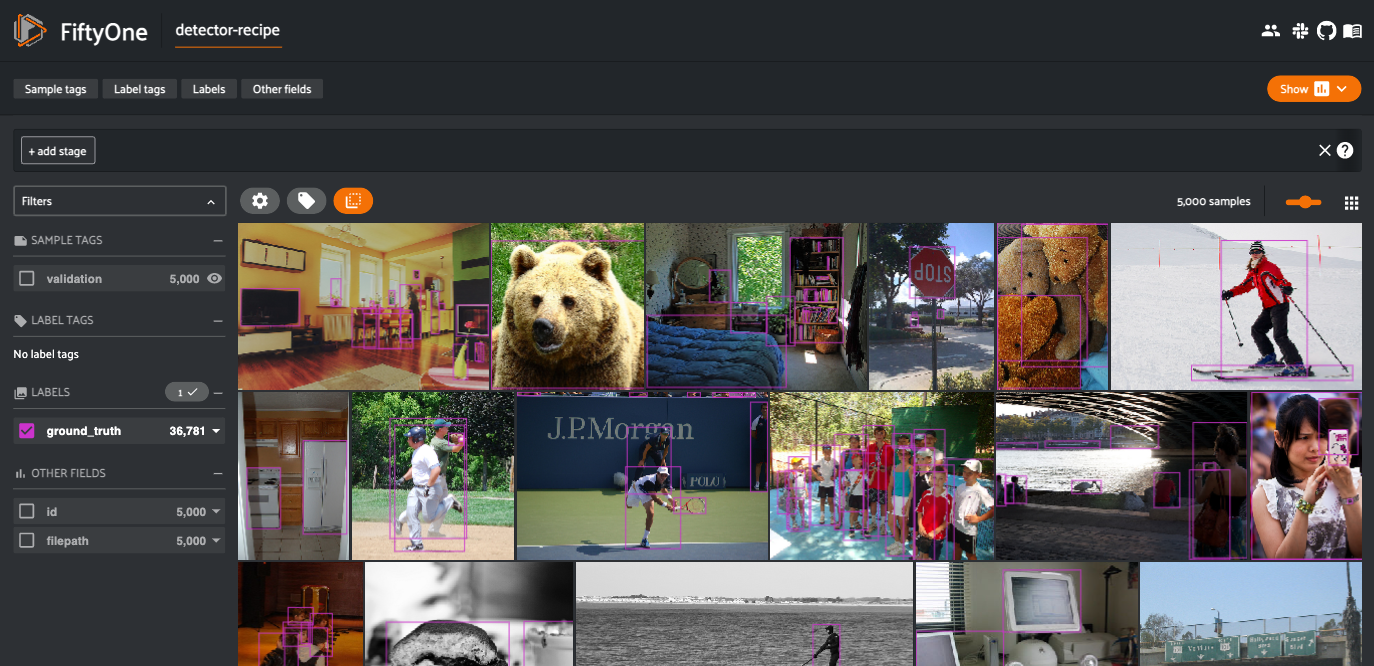

In [4]:
session = fo.launch_app(dataset)

### Testing a model to predict

In [5]:
import torch
import torchvision

# Run the model on GPU if it is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load a pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.to(device)
model.eval()

print("Model ready")

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /Users/mariu/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:07<00:00, 21.6MB/s] 


Model ready


In [6]:
# Choose a random subset of 100 samples to add predictions to
predictions_view = dataset.take(100, seed=51)

In [7]:
from PIL import Image
from torchvision.transforms import functional as func

import fiftyone as fo

# Get class list
classes = dataset.default_classes

# Add predictions to samples
with fo.ProgressBar() as pb:
    for sample in pb(predictions_view):
        # Load image
        image = Image.open(sample.filepath)
        image = func.to_tensor(image).to(device)
        c, h, w = image.shape

        # Perform inference
        preds = model([image])[0]
        labels = preds["labels"].cpu().detach().numpy()
        scores = preds["scores"].cpu().detach().numpy()
        boxes = preds["boxes"].cpu().detach().numpy()

        # Convert detections to FiftyOne format
        detections = []
        for label, score, box in zip(labels, scores, boxes):
            # Convert to [top-left-x, top-left-y, width, height]
            # in relative coordinates in [0, 1] x [0, 1]
            x1, y1, x2, y2 = box
            rel_box = [x1 / w, y1 / h, (x2 - x1) / w, (y2 - y1) / h]

            detections.append(
                fo.Detection(
                    label=classes[label],
                    bounding_box=rel_box,
                    confidence=score
                )
            )

        # Save predictions to dataset
        sample["predictions"] = fo.Detections(detections=detections)
        sample.save()

 100% |█████████████████| 100/100 [16.9m elapsed, 0s remaining, 0.1 samples/s]    


In [8]:
session.view = predictions_view

In [ ]:
session.show()